In [1]:
# import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice
import matplotlib as mpl
from amftrack.pipeline.final_analysis.density_wave import plot_single_plate,plot_single_plate_biovolume
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
from amftrack.util.plot import gridplot, make_stat
from helper import *

%store -r path_figure
%matplotlib widget
%load_ext autoreload
%autoreload 2
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy
import statsmodels.api as sm
import hashlib
from matplotlib.patches import Ellipse
import logging
plt.style.use('presentation.mplstyle')
logging.getLogger().setLevel(logging.WARNING)

all_analysis_folders = get_analysis_folders()

plate_select = [792,1014,1042,127,130,1023,1045,1053,1048,52,84,938,1076,94,152,102,76,3,12,16,480,91,799,800] #C2
plates = ['1014_20220525', '1023_20220502',
          # '102_20201226',
          '1042_20220523',
       '1045_20220504', '1048_20220506',
          # '1053_20220413',
          '1076_20220511',
       # '127_20220705',
          # '152_20201224',
          "3_20220426", "12_20220502","16_20220419","480_20221205", '52_20220707',
          # '76_20210108',
       # '792_20210915', '799_20211001', '800_20210928',
          '84_20220621', '91_20220708', '938_20220325',
          # '94_20201123'
         ]
plates += ["28_20230227",
"206_20230303",
"202_20230314",
"218_20230227",
"219_20230307",
"229_20230330",]
# plates += [
# "850_20230511",
# "840_20230404",
# "861_20230411"
# ]
plates += ["527_20230106","537_20230111"]
plates += ["462_20221013"]
plates += ["532_20220104"]
plates += [
"249_20230324",
"241_20230403",
"252_20230316",
"248_20230320",
]
plates += ["510_20221201","521_20230104","530_20230115"]

analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,False)


In [4]:
time_plate_info["density"] = time_plate_info["tot_length_study"]/time_plate_info["area_sep_comp"]


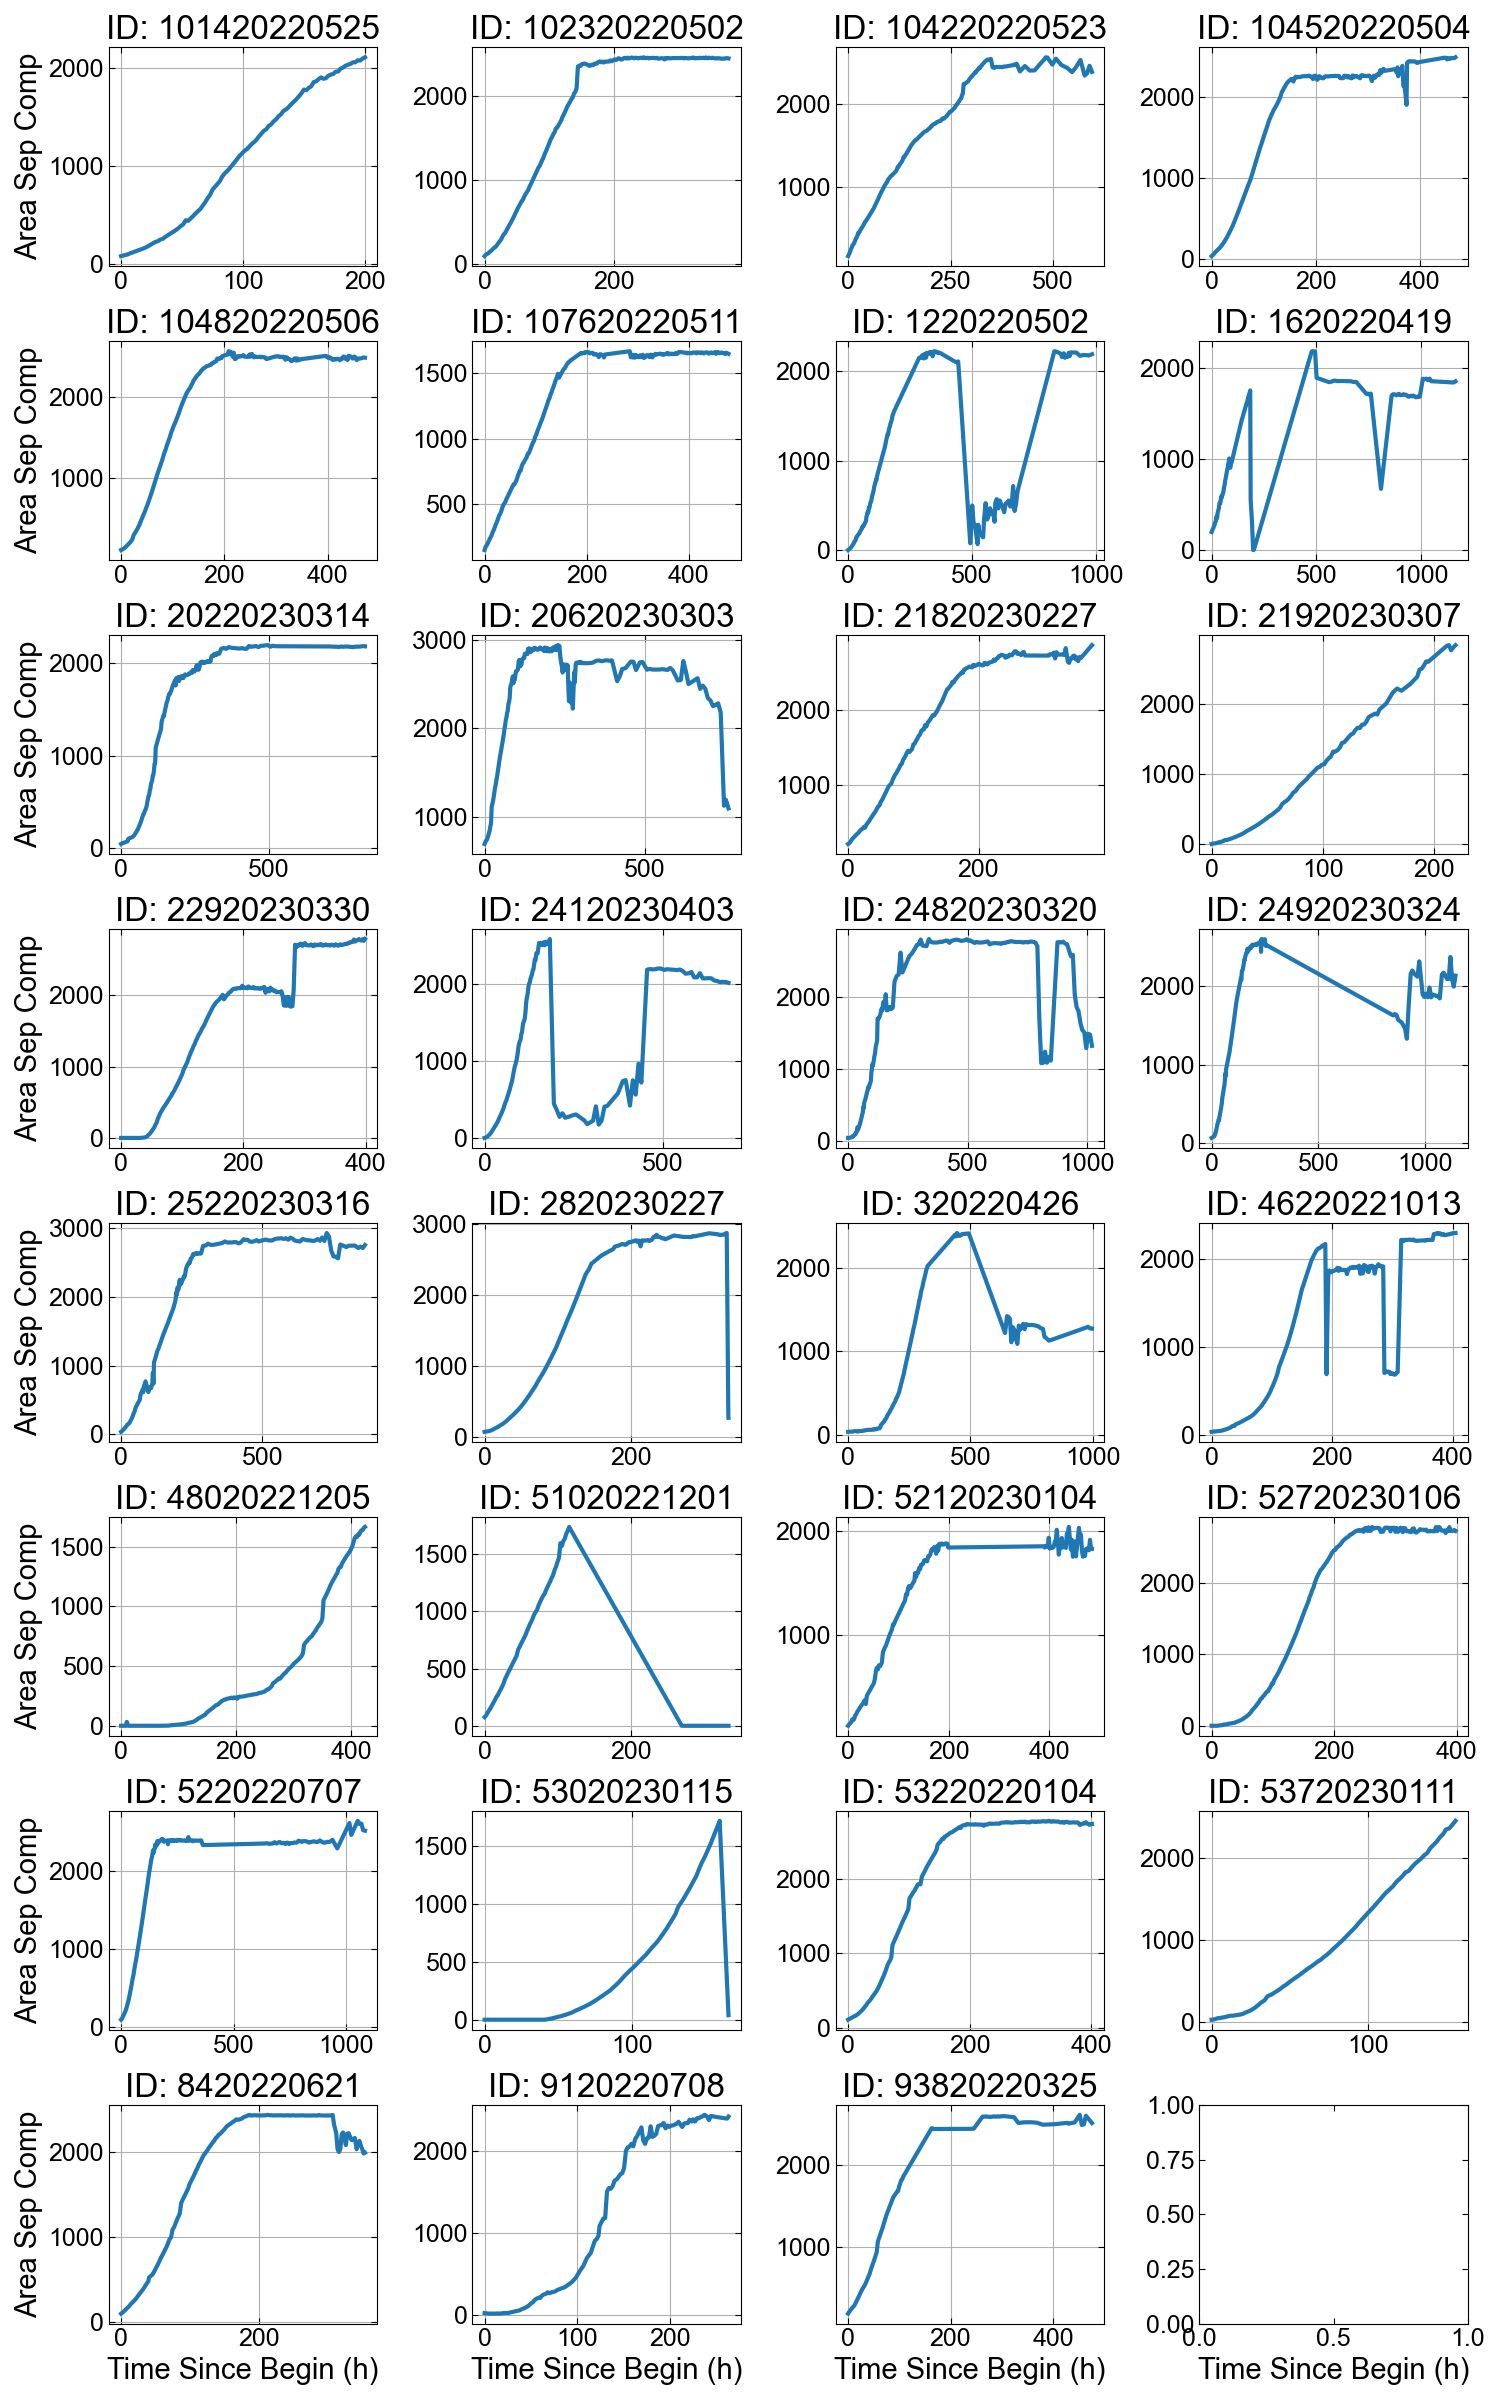

In [6]:
import matplotlib.pyplot as plt
import numpy as np

unique_ids = time_plate_info['unique_id'].unique()
num_unique_ids = len(unique_ids)

# Determine the number of rows and columns for the subplots
n = 4  # max number of columns
num_rows = int(np.ceil(num_unique_ids / n))
num_cols = min(n, num_unique_ids)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# In case there's only one row, make sure axes is a 2D array
if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)

for i, unique_id in enumerate(unique_ids):
    row = i // n
    col = i % n

    subset = time_plate_info[time_plate_info['unique_id'] == unique_id]
    axes[row, col].plot(subset['time_since_begin_h'], subset['area_sep_comp'])
    
    axes[row, col].set_title(f'ID: {unique_id}')
    axes[row, col].grid(True)

# Set common labels
for ax in axes[-1, :]:
    ax.set_xlabel('Time Since Begin (h)')
for ax in axes[:, 0]:
    ax.set_ylabel('Area Sep Comp')

plt.tight_layout()
